In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import numpy as np
import umap
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture
from sklearn.feature_selection import SelectKBest, f_classif
import pylab
import scipy
import sklearn
import time
import seaborn as sns
from mpl_toolkits import mplot3d 
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

In [3]:
pd.set_option("display.max_rows", 250000)

In [4]:
df = pd.read_csv('/Users/robholmstrom/OneDrive/Gitrepos/nonrepo_files/GSE59114.csv', header = 1)
df1 = df.T
df1.columns = df1.loc['Gene Symbol'].reset_index()
df1 = df1.drop(['Gene Symbol', 'UCSC transcripts'])
df1.columns = [x[1] for x in df1.columns]
df1.columns = df1.columns.str.replace("'", "")
df1.shape

(1434, 8422)

Itgam, Ly6g, Ptprc, Cd3e, Ly76, Kit, Ly6a, Cd48, Slamf1

In [5]:
import re
df1_1 = df1[~df1.index.str.contains('biol_replicate')]
df1_1 = df1_1.drop(['\'Young LT-HSC\'','\'Young ST-HSC\'', '\'Young MPP\'','\'Old LT-HSC\'', '\'Old ST-HSC\'','Old MPP\''])
#df1_1 = df1_1.drop(['Itgam', 'Ptprc', 'Kit', 'Ly6a', 'Cd48', 'Slamf1'], axis = 1)

In [6]:
df1_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, young_LT_HSC_2 to old_MPP_168
Columns: 8422 entries, Npl to Sft2d1
dtypes: object(8422)
memory usage: 68.0+ MB


In [7]:
df1_1.index = df1_1.index.str.replace(r'[^a-zA-Z]', '')

print((df1_1.columns).shape)
print(np.unique(df1_1.columns).shape)

(8422,)
(8357,)


In [8]:
df1_1dup = df1_1[df1_1.loc[:,df1_1.columns.duplicated()].columns]


In [14]:
dupcols = np.unique(df1_1dup.columns)
dupcols

array(['Abcg2', 'Arih1', 'Atf7ip', 'Atrip', 'Brwd1', 'Cbx1', 'Ccnd3',
       'Cdk6', 'Celf1', 'Commd1', 'Csnk1a1', 'Ctse', 'Dnajb6', 'Eci2',
       'Eif1ax', 'Fgd4', 'Fus', 'G3bp1', 'Glod4', 'Gm10598', 'Gm13215',
       'Hjurp', 'Ikbkb', 'Ing4', 'Itga4', 'Itga6', 'Kansl2', 'Lcor',
       'Lrrc29', 'Luc7l2', 'Mafg', 'Mecom', 'Mob1a', 'Mtcp1', 'Nagk',
       'Ndufa3', 'Pafah1b1', 'Patz1', 'Pcif1', 'Pik3ip1', 'Psme4', 'Pten',
       'Ramp2', 'Rpl24', 'Rspry1', 'Satb1', 'Smarcc2', 'Srcap', 'Srsf10',
       'Sugp2', 'Taf9', 'Tex261', 'Tmem167b', 'Tmem181b-ps', 'Trappc9',
       'Trim30b', 'U2af1l4', 'Utp23', 'Wwp2', 'Zbtb20', 'Zfp708',
       'Zfp869', 'Zgpat'], dtype=object)

In [15]:
df1_1dupgroup = df1_1dup.groupby(df1_1dup.columns, axis=1).sum()

In [16]:
df1_1dupmean = pd.DataFrame()
for x in dupcols:
    df1_1dupmean[x] = df1_1dupgroup[x]/df1_1dup.columns.tolist().count(x)


In [17]:
# cols = []
# n = 1
# for x in df2dup.columns:
#     if x in cols:
#         cols.append(x+'.'+str(n))
#         n += 1
#     else:
#         cols.append(x)
#         n = 1


In [20]:
dfnodup = df1_1.loc[:,~df1_1.columns.duplicated()].drop(dupcols, axis = 1)

df2 = pd.concat([dfnodup, df1_1dupmean], axis = 1)

df2= df2.round(2)
df2.shape

(1058, 8357)

In [32]:
genefracs = (df2==0).sum()/(df2==0).count()
passindex = genefracs[genefracs < 1]


In [33]:
zifa = df2[passindex.index]
zifa= np.round(zifa.astype(np.float64),4)
zifa[['Itgam', 'Ptprc', 'Kit', 'Ly6a', 'Cd48', 'Slamf1']]


Itgam    Ptprc      Kit     Ly6a     Cd48  Slamf1
youngLTHSC   0.0000   7.6541   4.2994   0.0000   0.0000  0.0000
youngLTHSC   2.0108   6.4965  10.2702   0.0000   0.0000  0.0000
youngLTHSC   0.0000   8.4168   8.5237   8.4060   0.0000  0.0000
youngLTHSC   0.0000   9.6909   9.9465   0.0000   0.0000  0.0000
youngLTHSC   0.0000   0.0000  10.0181   7.2606   0.0000  4.0747
youngLTHSC   0.0000   4.4854  10.3731   9.6621   0.0000  0.0000
youngLTHSC   1.1827   6.4395  11.0769   8.9879   0.0000  8.6869
youngLTHSC   0.0000   8.4729   8.6405   8.6886   0.0000  0.0000
youngLTHSC   0.8953   2.5850   8.2083   0.0000   0.0000  8.3932
youngLTHSC   0.9336   0.0000   9.0719   0.0000   0.0000  7.2242
youngLTHSC   0.0000   7.0177   9.7381   0.0000   8.2060  0.0000
youngLTHSC   0.0000   7.4627   9.2335  10.5293   0.0000  0.0000
youngLTHSC   0.0000   7.6449   8.0833   8.7878   0.0000  0.0000
youngLTHSC   9.9479   8.0477   8.4325   2.7137   0.0000  0.0000
youngLTHSC   0.0000   0.0000  10.0434   9.7560   1.7866  0.0000
youngLTHSC   0.0000   5.3947   8.8038   0.0000   0.0000  0.0000
youngLTHSC   0.0000   6.5281   9.8007   9.6660   0.0000  0.0000
youngLTHSC   0.5850   9.7706   9.3661   6.9750   0.0000  2.7719
youngLTHSC   0.9030   8.1332   9.7351  10.2002   0.0000  0.0000
youngLTHSC   0.0000   0.8074  10.1582   0.0000   0.0000  9.2033
youngLTHSC   0.0000   7.7047   8.8105   8.5087   0.0000  0.0000
youngLTHSC   0.0000   1.2203   8.2805   7.6570   0.0000  8.3730
youngLTHSC   0.0000   1.9672  10.3157   9.2653   0.0000  0.0000
youngLTHSC   0.2630   6.9087   9.8586   0.0000   0.0000  6.6275
youngLTHSC   0.0000   0.4330   8.6133   0.0000   0.0000  0.0000
youngLTHSC   0.9855   8.2121   9.4365   0.0000   0.0000  7.8113
youngLTHSC   0.0000   0.0000   8.8471   0.0000   0.0000  0.0000
youngLTHSC   0.0000   0.0000  10.3354   0.0000   0.0000  0.0000
youngLTHSC   0.0000   1.4647   8.6675   0.0000   0.0000  0.0000
youngLTHSC   0.0000   7.7071  10.1690   9.2170   0.0000  0.0000
youngLTHSC   0.0000   7.0686  10.1269   8.2951   0.0000  0.0000
youngLTHSC   0.4005   5.1562   6.9877   0.0000   0.0000  0.0000
youngLTHSC   0.3334   7.9031  10.4559   9.9649   0.0000  7.4102
youngLTHSC   0.0000   7.5278   9.5044   0.0000   0.0000  0.0000
youngLTHSC   0.0000   7.7766   8.3501   0.0000   0.0000  8.4025
youngLTHSC   0.0000   0.0000  10.7316   9.1946   0.0000  0.0000
youngLTHSC   0.0000   5.9208  10.1474   0.0000   0.0000  0.0000
youngLTHSC   4.0985   7.4216   8.8730   8.1234   0.0000  0.0000
youngLTHSC   0.0000   7.8769   9.9497   0.0000   0.0000  0.0000
youngLTHSC   0.0000   9.4058   9.0740   0.0000   0.0000  1.0000
youngLTHSC   0.0000   8.7268   8.7288   0.0000   0.0000  0.0000
youngLTHSC   0.0000   0.0000  10.6500   0.0000   0.0000  0.0000
youngLTHSC   0.0000   0.5945   7.2602   0.0000   0.0000  0.0000
youngLTHSC   0.0000   7.7647  10.3209   0.0000   0.0000  0.0000
youngLTHSC   0.0000   9.4437   9.9487   0.0000   0.0000  0.0000
youngLTHSC   8.4207   8.6562  10.2384  10.4378   0.0000  8.6392
youngLTHSC   0.5558   7.6256   8.7806   0.0000   0.0000  0.0000
youngLTHSC   2.1635   7.3137   8.2642   8.8235   0.0000  0.0000
youngLTHSC   0.0000   0.9928  10.6891   9.9157   0.0000  0.0000
youngLTHSC   0.0000   0.0000  11.5356   2.4699   0.0000  8.2794
youngLTHSC   0.7655   8.0467   8.0725   0.0000   0.0000  8.1171
youngLTHSC   8.6049   7.7409  11.0111   8.1121   0.0000  0.0000
youngLTHSC   0.0000   9.4411   9.7866  12.2328   0.0000  1.1110
youngLTHSC   0.0000   0.4222  10.4605   0.0000   0.0000  0.0000
youngLTHSC   0.0000   0.0000   9.5331   0.0000   0.0000  0.0000
youngLTHSC   4.7109   1.7137  10.7507   1.7225   0.0000  6.8593
youngLTHSC   0.0000   2.0909   9.0595   0.0000   0.0000  0.0000
youngLTHSC   0.0000   8.2398   7.7634  10.3291   0.0000  0.0000
youngLTHSC   0.0000   6.2913   9.7324   7.8705   0.0000  0.0000
youngLTHSC   0.0000   8.4864   8.9717   8.9138   0.0000  8.6986
youngLTHSC   0.0000   6.6519  10.1490   9.0624   0.0000  0.6599
youngLTHSC   0.0000   6.2172  10.5414   0.0000

In [34]:
zifa = np.array(zifa)
zifa.shape

(1058, 8357)

In [35]:
from ZIFA import ZIFA
from ZIFA import block_ZIFA

In [36]:
start_time = time.time()
Z, model_params = block_ZIFA.fitModel(zifa, 5)
print("--- %s seconds ---" % (time.time() - start_time))

Filtering out all genes which are zero in more than 95.0% of samples. To change this, change p0_thresh.
Number of blocks has been set to 16
Running block zero-inflated factor analysis with N = 1058, D = 8246, K = 5, n_blocks = 16
Block sizes [515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 521]
Param change below threshold 1.000e-02 after 12 iterations
--- 1126.9811148643494 seconds ---


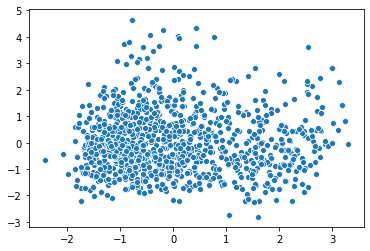

In [40]:
dfz = pd.DataFrame(Z, index = df2.index)
pcaz = PCA(n_components=3, random_state = 42)

zcomps = pcaz.fit_transform(dfz)
sns.scatterplot(zcomps[:,0], zcomps[:,1])
plt.show()

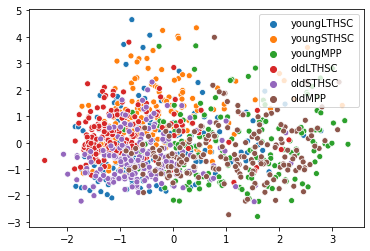

In [41]:
sns.scatterplot(zcomps[:,0], zcomps[:,1], hue = dfz.index)
plt.show()

In [43]:
encoded = {'oldLTHSC':0, 'oldMPP':1, 'oldSTHSC':2, 'youngLTHSC':3, 'youngMPP':4, 'youngSTHSC':5}
cells = ['oldLTHSC' ,'oldMPP', 'oldSTHSC', 'youngLTHSC' ,'youngMPP' ,'youngSTHSC']
cell_types = [encoded.get(x, x) for x in dfz.index]
colormap = ['r', 'b', 'g', 'y', 'c', 'm']
cell_colors = [colormap[x] for x in cell_types]
dfpca = pd.DataFrame(zcomps, index = dfz.index)
dfpca
fig = px.scatter_3d(dfpca, zcomps[:,0], zcomps[:,1],zcomps[:,2], dfpca.index)
fig.update_traces(marker=dict(opacity =1, size=3,
                              line=dict(width= .1)))

fig.show()

In [34]:
np.cov(dfz)

array([[ 0.07177043,  0.1863697 ,  0.10914938, ..., -0.14769498,
        -0.1182662 , -0.26101148],
       [ 0.1863697 ,  0.5712172 ,  0.32080619, ..., -0.50545549,
        -0.43035056, -0.83627412],
       [ 0.10914938,  0.32080619,  0.33288386, ..., -0.23781537,
        -0.25797732, -0.56641976],
       ...,
       [-0.14769498, -0.50545549, -0.23781537, ...,  0.52078497,
         0.52967083,  0.78476776],
       [-0.1182662 , -0.43035056, -0.25797732, ...,  0.52967083,
         0.77318193,  0.84491375],
       [-0.26101148, -0.83627412, -0.56641976, ...,  0.78476776,
         0.84491375,  1.38111727]])

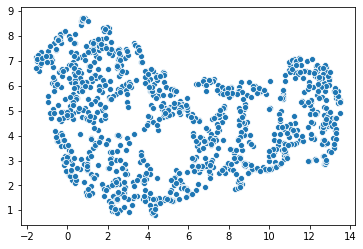

In [44]:
zumap = umap.UMAP(n_neighbors=20,
                      min_dist=.2,
                      metric='correlation').fit_transform(dfz)
sns.scatterplot(zumap[:,0], zumap[:,1])
fig.set_title('ZIFA-UMAP (5 dim): genes with fewer than 95% zeros; cell type labels')
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))

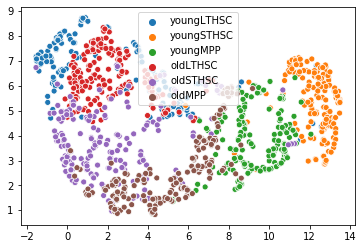

In [45]:
sns.scatterplot(zumap[:,0], zumap[:,1], hue = dfz.index)

In [46]:
gmm = GaussianMixture(n_components = 6)
gmm.fit(dfz)
cluster = gmm.fit_predict(dfz)


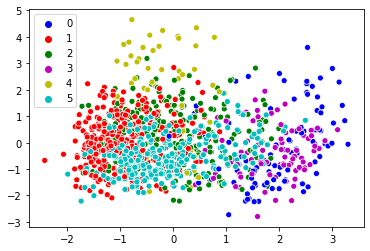

In [47]:
sns.scatterplot(zcomps[:,0], zcomps[:,1], hue = cluster, palette =['b', 'r', 'g', 'm', 'y', 'c'])

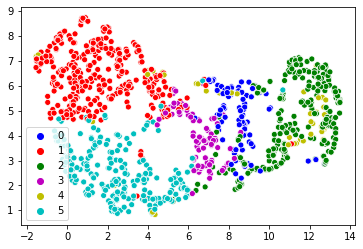

In [48]:
sns.scatterplot(zumap[:,0], zumap[:,1], hue = cluster, palette =['b', 'r', 'g', 'm', 'y', 'c'])

In [49]:
km = KMeans(n_clusters = 6, random_state=42)
kmdata = km.fit_transform(dfz)
kpred = km.fit_predict(dfz)

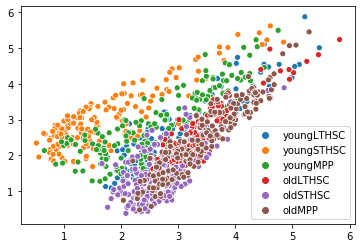

In [50]:
sns.scatterplot(kmdata[:,0], kmdata[:,1], hue = dfz.index)

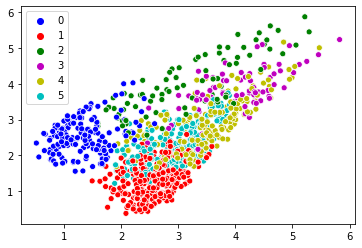

In [52]:
sns.scatterplot(kmdata[:,0], kmdata[:, 1], hue = kpred, palette =['b', 'r', 'g', 'm', 'y', 'c'])

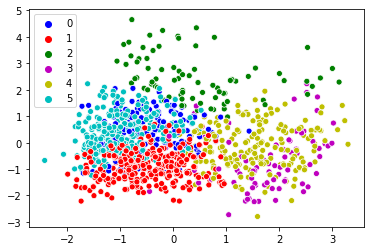

In [53]:
sns.scatterplot(zcomps[:,0], zcomps[:,1], hue = kpred, palette =['b', 'r', 'g', 'm', 'y', 'c'])

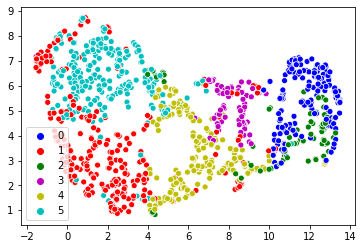

In [54]:
sns.scatterplot(zumap[:,0], zumap[:,1], hue = kpred, palette =['b', 'r', 'g', 'm', 'y', 'c'])

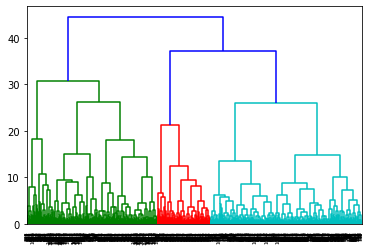

In [45]:
dendrogram(linkage(dfz, method = 'ward'))
plt.show()

In [46]:
dfcelltypes = pd.DataFrame(df2.mean(), columns = ['All cell average'])
dfcelltypes['youngLTHSC'] = df2[df2.index == 'youngLTHSC'].mean()
dfcelltypes['youngSTHSC'] = df2[df2.index == 'youngSTHSC'].mean()
dfcelltypes['youngMPP'] = df2[df2.index == 'youngMPP'].mean()
dfcelltypes['oldLTHSC'] = df2[df2.index == 'oldLTHSC'].mean()
dfcelltypes['oldSTHSC'] = df2[df2.index == 'oldSTHSC'].mean()
dfcelltypes['oldMPP'] = df2[df2.index == 'oldMPP'].mean()


In [47]:
dfcellbroad = pd.DataFrame(df2.mean(), columns = ['All cell average'])
dfcellbroad['HSC'] = df2[df2.index.str.contains('HSC')].mean()
dfcellbroad['MPP'] = df2[df2.index.str.contains('MPP')].mean()
dfcellbroad['HSC/MPP'] = dfcellbroad['HSC']/dfcellbroad['MPP']
dfcellbroad.sort_values(by = ['HSC/MPP','HSC','MPP'], ascending = False).head(25000)


All cell average  \
Efna1                                                       0.643544   
Epor                                                        0.195877   
A230065H16Rik                                               0.188853   
Entpd2                                                      0.118546   
uc012bnh.1                                                  0.012621   
Chst2                                                       0.390360   
Tenc1                                                       0.414738   
Sytl5                                                       0.261054   
Smtnl1                                                      0.344110   
Fkbp10                                                      0.207363   
Trim47                                                      0.618175   
Sdpr                                                        1.132630   
Prom2                                                       0.127064   
Gstm2                                                       0.393672   
Cldn5                                                       0.133280   
Nupr1                                                       2.090327   
Gpx3                                                        0.422264   
D630039A03Rik                                               0.693411   
Plxdc2                                                      0.888490   
Clip3                                                       0.347333   
Pde6h                                                       0.221191   
uc007cvp.1,uc007cvq.1                                       0.324404   
Snrpn                                                       0.428033   
Upp1                                                        0.927185   
Gm13986                                                     0.386996   
Ndn                                                         1.065439   
Tgm2                                                        2.373461   
Sult1a1                                                     1.656241   
Hid1                                                        0.731313   
Tgfb3                                                       0.188622   
Zfp612                                                      0.548159   
Eno2                                                        0.214290   
Hba-a2                                                      0.698456   
Mt2                                                         0.389157   
Tinagl1                                                     1.058981   
Reep2                                                       0.324417   
Ehd3                                                        0.907648   
Fam46c                                                      0.120244   
Fam110c                                                     0.711369   
Abcg3                                                       2.109270   
Clca1                                                       0.969792   
Vwf                                                         1.211336   
Clec1a                                                      1.491799   
Hbb-b1                                                      0.696732   
Kazald1                                                     0.335396   
Ocln                                                        0.451780   
Rprm                                                        0.116883   
Npdc1                                                       1.094193   
Mmrn1                                                       4.407780   
Clu                                                         1.038810   
Wfdc2                                                       0.509162   
Grb10                                                       2.193117   
Rhd                                                         0.059553   
Hgfac                                                       0.722850   
Gimap4                                                      0.461725   
Abcb1a              